In [1]:
from field_matching_utils import *
from io_utils import *
from score_utils import *

In [ ]:
# VinDr metadata on Luna: '/projects01/didsr-aiml/common_data/VinDr-Mammo/raw-images/vindr-mammo/1.0.0/metadata.csv'
# Required metadata path: '/home/tahsin.rahman/data/required_metadata_fields.csv'
# InBreast metadata on Luna: '/projects01/didsr-aiml/common_data/InBreast/INbreast.csv'

Required Header		Matched Dataset Header
---------------------------------------------
Pixel Spacing       	Pixel Spacing
Manufacturer        	Manufacturer
Patient Birth Date/Age	Patient's Age
Breast Orientation  	View Position
Image Dimension     	Rows        
Manufacturer/Model  	Manufacturer's Model Name

Missing Headers: ['Patient ID', 'Patient Sex', 'History/Prior', 'Race', 'Ethnicity', 'History/Family', 'Marital status', 'ZIP Code', 'Study ID', 'Study Date', 'Study Time', 'Modality', 'Laterality', 'Image Type', 'Image ID', 'Resolution', 'File Format', 'Compression Type', 'Bits Stored', 'Manufacturer/Year', 'Manufacturer/Regulatory']

Unexpected Headers: ['SOP Instance UID', 'Series Instance UID', 'SOP Instance UID.1', 'Image Laterality', 'Photometric Interpretation', 'Columns', 'Imager Pixel Spacing', 'Pixel Padding Value', 'Pixel Padding Range Limit', 'Window Center', 'Window Width', 'Rescale Intercept', 'Rescale Slope', 'Rescale Type', 'Window Center & Width Explanation']

Compl

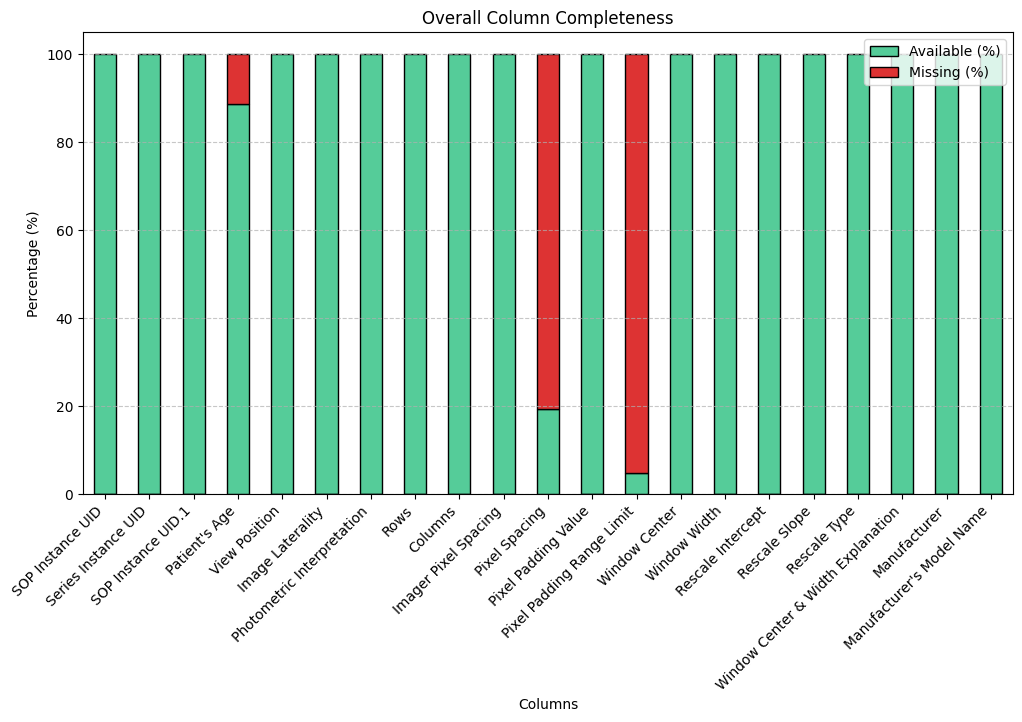

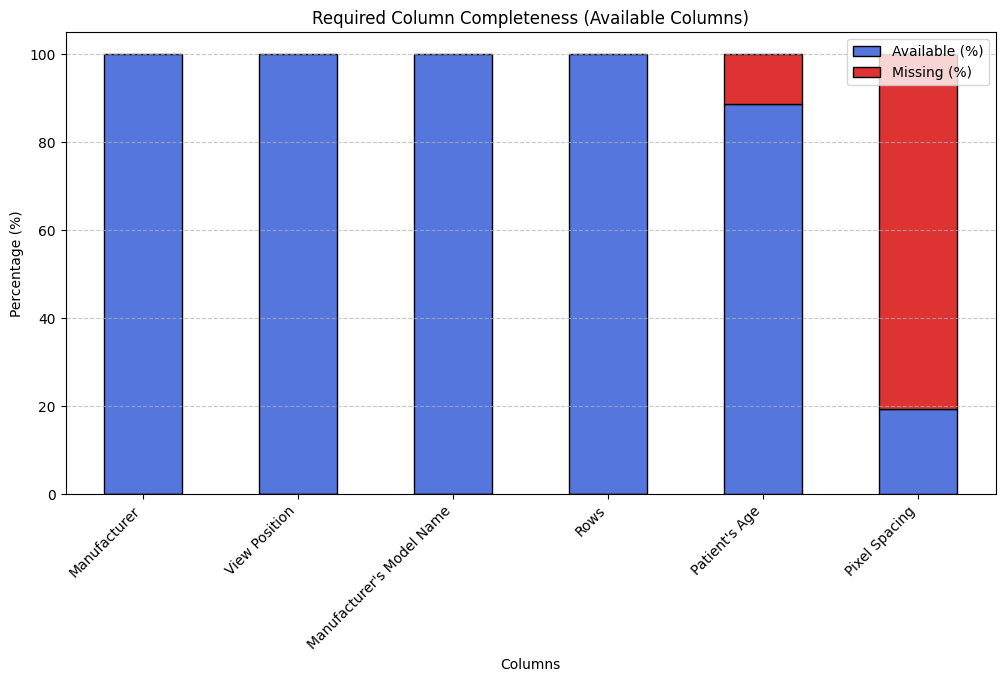

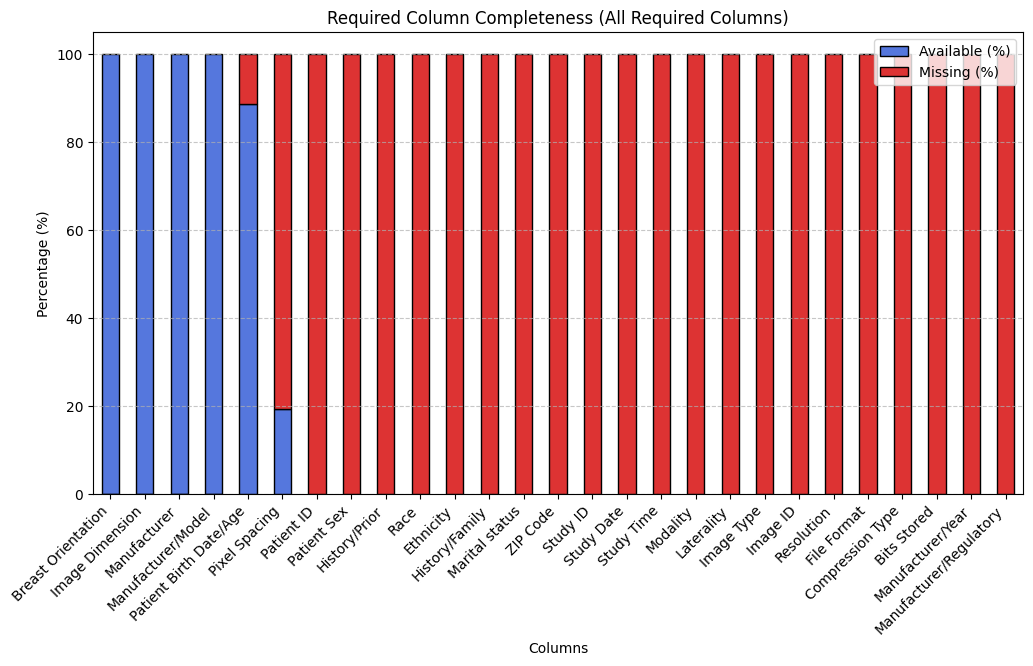

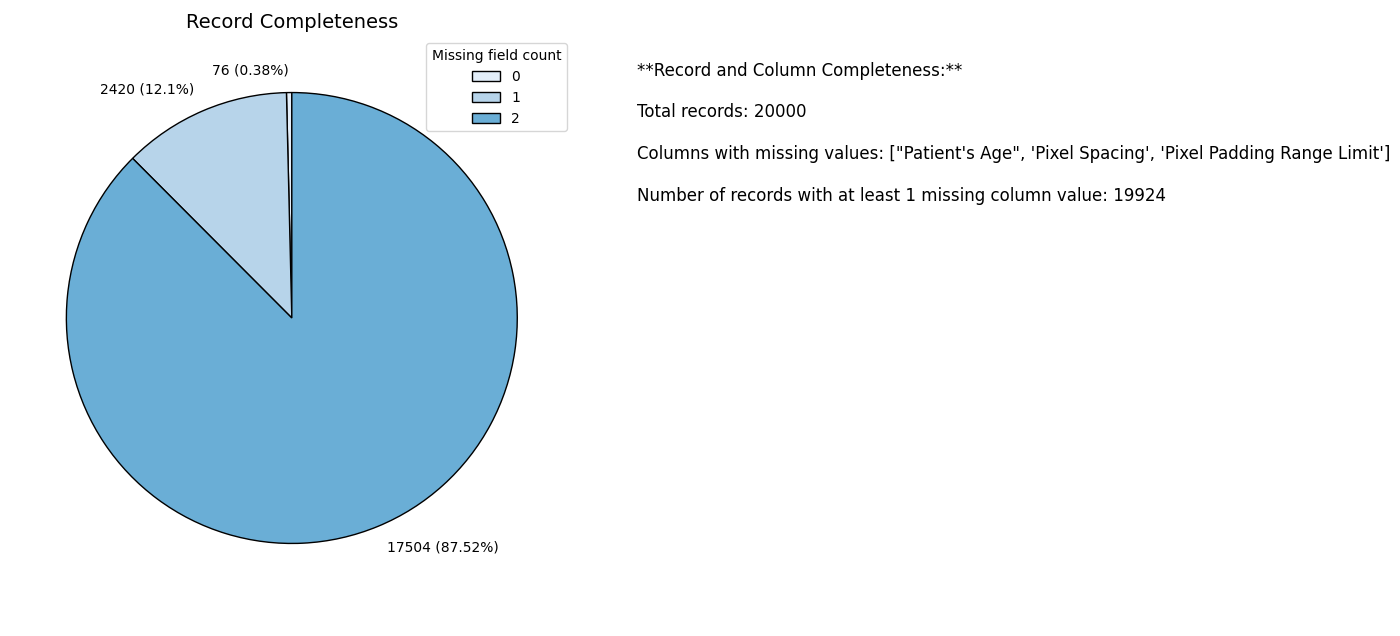

In [2]:
# Step 1: Load required metadata fields
# This step reads the required fields from a CSV file that contains a single column listing all expected metadata attributes (e.g., 'PatientID', 'Modality', 'StudyDate').
metadata_reference_path = '/projects01/didsr-aiml/tahsin.rahman/dcard-completeness/data_files/metadata_dictionary.json'
completeness_check_level = 'Core Fields'
metadata_reference_dictionary = get_dictionary(metadata_reference_path,completeness_check_level)
required_fields = metadata_reference_dictionary.keys()

# Step 2: Load the dataset
# This step loads the dataset (a multi-column CSV file) into a pandas DataFrame. Each column represents a metadata attribute (e.g., 'PatientID', 'Modality'), and each row represents a data point.
dataset_path ='/projects01/didsr-aiml/common_data/VinDr-Mammo/raw-images/vindr-mammo/1.0.0/metadata.csv'  # Replace with your dataset's file path
dataset_df = load_metadata_file(dataset_path)

# Step 3: Perform dataset-level completeness check
# This checks if the dataset's headers (column names) match the required fields.
# - Missing Headers: Required fields that are not present in the dataset.
# - Unexpected Headers: Fields present in the dataset that are not part of the required fields.

header_matching_methods = {
    'strict':(True,None),
    'dictionary':(True,{'field_dictionary':metadata_reference_dictionary}),
    'soft': (False,None),
    'fuzzy': (False,{'threshold':80}),
}

if dataset_df is not None and required_fields:
    completeness_report = dataset_level_completeness_check(dataset_df, required_fields, header_matching_methods)

    # Extract missing and unexpected headers for clarity
    available_header_map = completeness_report["available_header_map"]
    missing_headers = completeness_report["missing_headers"]
    unexpected_headers = completeness_report["unexpected_headers"]
    completeness_score = completeness_report["completeness_score"]

    # Step 4: Show header mapping
    # If there are required fields missing from the dataset, list them.
    if available_header_map:
        print('Required Header\t\tMatched Dataset Header')
        print('---------------------------------------------')
        for k,v in available_header_map.items():
            print('{:<20}\t{:<12}'.format(k,v))
        # available_header_map_df = pd.DataFrame(available_header_map.items(), columns=["Required Header", "Dataset Header"])
        # display(available_header_map_df)
    else:
        print(f"All required fields are missing for {completeness_check_level}.")

    # Step 4: Report Missing Headers
    # If there are required fields missing from the dataset, list them.
    if missing_headers:
        print(f"\nMissing Headers: {missing_headers}\n")
    else:
        print("No missing headers. All required fields are present.")

    # Step 5: Report Unexpected Headers
    # If the dataset contains extra fields not listed in the required fields, list them.
    if unexpected_headers:
        print(f"Unexpected Headers: {unexpected_headers}\n")
    else:
        print("No unexpected headers. All dataset fields are required.")

    # Step 6: Report Completeness Score
    print(f"Completeness Score: {completeness_score:.2f}")
else:
    # Handle cases where either the dataset or required fields failed to load.
    print("Failed to load dataset or required fields.")

record_level_results = record_level_completeness_check(dataset_df, required_fields, available_header_map,visualize=True,savefig=True)